'Cluster Feature Statistics:'

,Driver Substance Abuse,Driver At Fault,Injury Severity,Type of Distraction,Vehicle Damage Extent
Cluster,,,,,
0,0.110658,0.914839,1.620092,0.000000,4.063743
1,0.068320,0.939000,1.324929,2.764538,4.066694
2,0.013986,0.909091,1.018981,0.000000,0.157842
3,0.044717,0.954887,1.074001,2.911357,2.233478
4,0.064327,0.806530,1.000000,0.000000,2.592593


/var/folders/yl/r3f8n_7s6h3dp8k4d5bl8gpm0000gn/T/ipykernel_912/22292367.py:41: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_clustered[data_clustered['Cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True)
/var/folders/yl/r3f8n_7s6h3dp8k4d5bl8gpm0000gn/T/ipykernel_912/22292367.py:41: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_clustered[data_clustered['Cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True)
/var/folders/yl/r3f8n_7s6h3dp8k4d5bl8gpm0000gn/T/ipykernel_912/22292367.py:41: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_clustered[data_clustered['Cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True)
/var/folders/yl/r3f8n_7s6h3dp8k4d5bl8gpm0000gn/T/ipykernel_912/2229

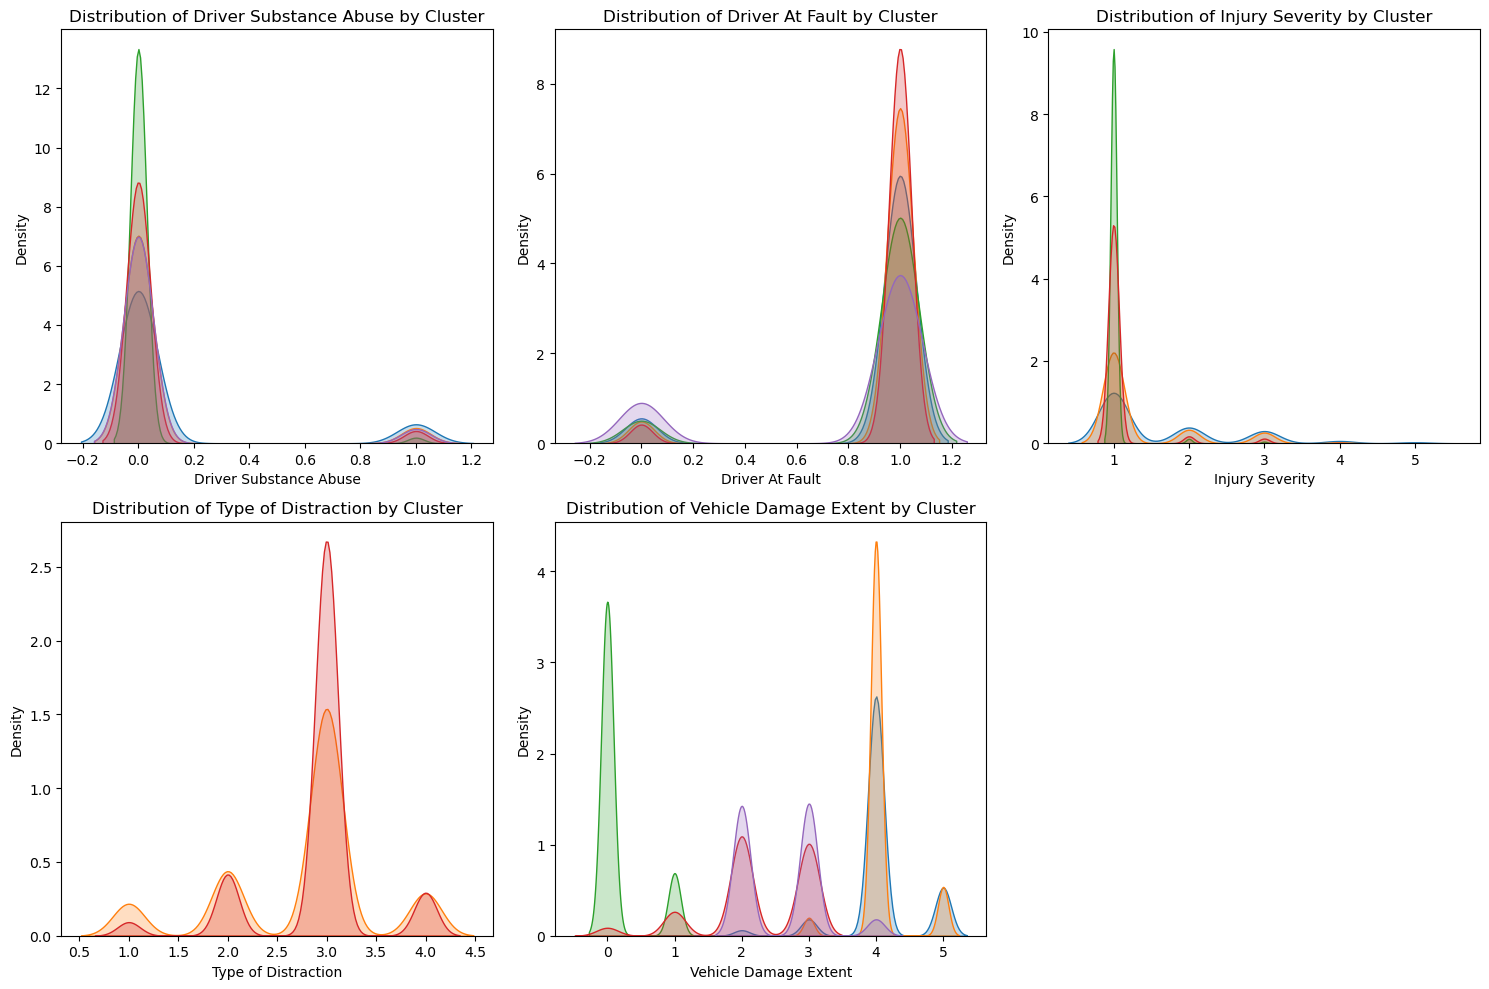

/var/folders/yl/r3f8n_7s6h3dp8k4d5bl8gpm0000gn/T/ipykernel_912/22292367.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(unique_clusters))


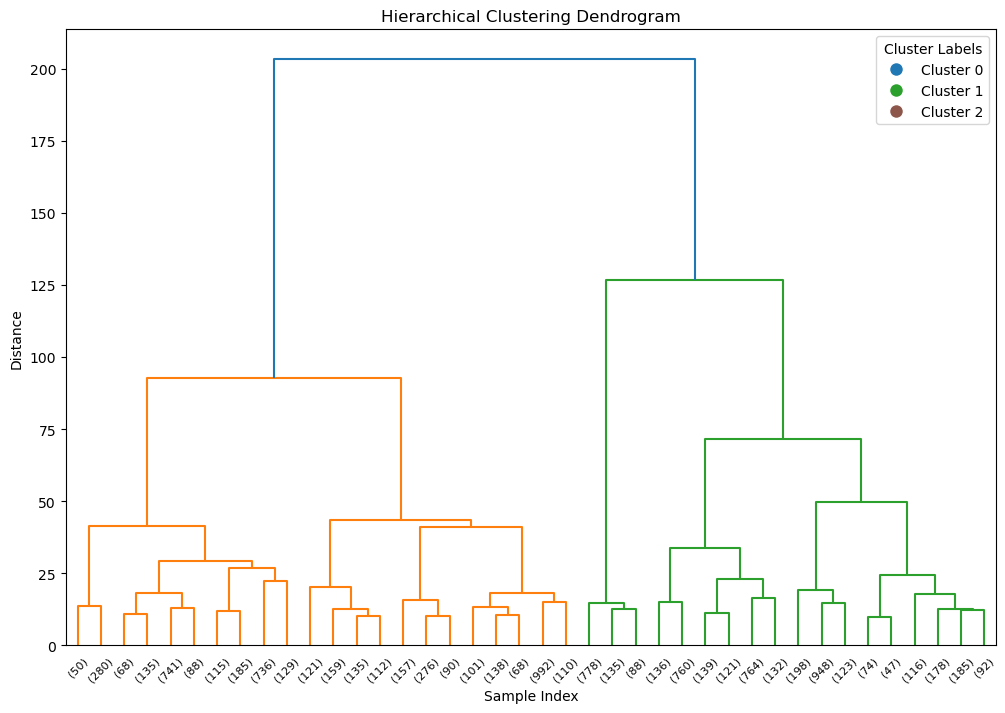

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
data = pd.read_excel('project_dataset.xlsx')

# Select relevant features for clustering
features = ['Driver Substance Abuse', 'Driver At Fault', 'Injury Severity', 'Type of Distraction', 'Vehicle Damage Extent']

# Sample size for clustering
sample_size = 10000

# Take a random sample from the dataset
data_sample = data.sample(n=sample_size, random_state=42)

# Prepare sampled data for clustering
data_preprocessed = pd.get_dummies(data_sample[features])

# Perform hierarchical clustering using agglomerative clustering with Ward linkage
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = cluster.fit_predict(data_preprocessed)

# Combine cluster labels with original data for analysis
data_clustered = data_sample.copy()
data_clustered['Cluster'] = cluster_labels

# Analyze feature distributions by cluster
cluster_stats = data_clustered.groupby('Cluster')[features].mean()
display("Cluster Feature Statistics:")
display(cluster_stats)

# Visualize feature distributions by cluster
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    for cluster in cluster_stats.index:
        sns.kdeplot(data_clustered[data_clustered['Cluster'] == cluster][feature], label=f'Cluster {cluster}', fill=True)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Visualize the hierarchical clustering using a dendrogram
linkage_matrix = linkage(data_preprocessed, method='ward')

# Plotting the dendrogram with annotated cluster labels
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, 
           truncate_mode='lastp',
           p=40)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

visible_clusters = [0, 1, 2]

# Get unique cluster labels and corresponding colors
unique_clusters = np.unique(cluster_labels)
color_map = plt.cm.get_cmap('tab10', len(unique_clusters))

# Create dendrogram legend
color_legend = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor=color_map(cluster), 
                            markersize=10, label=f'Cluster {cluster}')
                for cluster in visible_clusters]

plt.legend(handles=color_legend, title='Cluster Labels', loc='upper right')
plt.show()